# COGS 118B - Final Project

# Airline Sentiment Analysis

## Group members

- Sukhman Virk
- Athira Rajiv
- Neil Bajaj
- Yash Sharma
- Lucas Fasting

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /home/svirk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/svirk/nltk_data...


True

In [3]:
df = pd.read_csv('Tweets.csv')

In [4]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'], format='%Y-%m-%d %H:%M:%S %z')
df['date'] = df['tweet_created'].dt.strftime('%m, %d, %Y')
df['time'] = df['tweet_created'].dt.strftime('%H:%M')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),"02, 24, 2015",11:35
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),"02, 24, 2015",11:15
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),"02, 24, 2015",11:15
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),"02, 24, 2015",11:15
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),"02, 24, 2015",11:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01-08:00,NaN,NaN,"02, 22, 2015",12:01
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46-08:00,Texas,NaN,"02, 22, 2015",11:59
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15-08:00,"Nigeria,lagos",NaN,"02, 22, 2015",11:59
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02-08:00,New Jersey,Eastern Time (US & Canada),"02, 22, 2015",11:59


In [6]:
df = df.drop(columns=['tweet_location','retweet_count','name','airline_sentiment_gold','negativereason_gold','tweet_created','tweet_coord','negativereason_confidence'])
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time
0,570306133677760513,neutral,1.0000,NaN,Virgin America,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada),"02, 24, 2015",11:35
1,570301130888122368,positive,0.3486,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada),"02, 24, 2015",11:15
2,570301083672813571,neutral,0.6837,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada),"02, 24, 2015",11:15
3,570301031407624196,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada),"02, 24, 2015",11:15
4,570300817074462722,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada),"02, 24, 2015",11:14
...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,American,@AmericanAir thank you we got on a different f...,NaN,"02, 22, 2015",12:01
14636,569587371693355008,negative,1.0000,Customer Service Issue,American,@AmericanAir leaving over 20 minutes Late Flig...,NaN,"02, 22, 2015",11:59
14637,569587242672398336,neutral,1.0000,NaN,American,@AmericanAir Please bring American Airlines to...,NaN,"02, 22, 2015",11:59
14638,569587188687634433,negative,1.0000,Customer Service Issue,American,"@AmericanAir you have my money, you change my ...",Eastern Time (US & Canada),"02, 22, 2015",11:59


In [7]:
df = df.dropna(subset=['text'])
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time
0,570306133677760513,neutral,1.0000,NaN,Virgin America,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada),"02, 24, 2015",11:35
1,570301130888122368,positive,0.3486,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada),"02, 24, 2015",11:15
2,570301083672813571,neutral,0.6837,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada),"02, 24, 2015",11:15
3,570301031407624196,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada),"02, 24, 2015",11:15
4,570300817074462722,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada),"02, 24, 2015",11:14
...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,American,@AmericanAir thank you we got on a different f...,NaN,"02, 22, 2015",12:01
14636,569587371693355008,negative,1.0000,Customer Service Issue,American,@AmericanAir leaving over 20 minutes Late Flig...,NaN,"02, 22, 2015",11:59
14637,569587242672398336,neutral,1.0000,NaN,American,@AmericanAir Please bring American Airlines to...,NaN,"02, 22, 2015",11:59
14638,569587188687634433,negative,1.0000,Customer Service Issue,American,"@AmericanAir you have my money, you change my ...",Eastern Time (US & Canada),"02, 22, 2015",11:59


In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time
0,570306133677760513,neutral,1.0000,NaN,Virgin America,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada),"02, 24, 2015",11:35
1,570301130888122368,positive,0.3486,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada),"02, 24, 2015",11:15
2,570301083672813571,neutral,0.6837,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada),"02, 24, 2015",11:15
3,570301031407624196,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada),"02, 24, 2015",11:15
4,570300817074462722,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada),"02, 24, 2015",11:14


In [9]:
df.groupby(by=['airline']).count()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,text,user_timezone,date,time
airline,,,,,,,,
American,2759,2759,2759,1960,2759,1791,2759,2759
Delta,2222,2222,2222,955,2222,1613,2222,2222
Southwest,2420,2420,2420,1186,2420,1659,2420,2420
US Airways,2913,2913,2913,2263,2913,1851,2913,2913
United,3822,3822,3822,2633,3822,2527,3822,3822
Virgin America,504,504,504,181,504,379,504,504


In [10]:
text = list(df['text'])
# text

In [11]:
def clean_text(text):
    text = re.sub(r'@\w+', '', str(text))
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+[a-z]\s+', ' ',text)
    text = re.sub(r'^[a-z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [12]:
df['cleaned text'] = df['text'].apply(clean_text)

In [13]:
stop_words = set(stopwords.words('english'))
df['cleaned text'] = df['cleaned text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [14]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text
0,570306133677760513,neutral,1.0000,NaN,Virgin America,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada),"02, 24, 2015",11:35,said
1,570301130888122368,positive,0.3486,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada),"02, 24, 2015",11:15,plus added commercials experience tacky
2,570301083672813571,neutral,0.6837,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada),"02, 24, 2015",11:15,today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada),"02, 24, 2015",11:15,really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada),"02, 24, 2015",11:14,really big bad thing


In [15]:
text = list(df['cleaned text'])
# text

In [16]:
def get_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [17]:
df['our_airline_sentiment_val'] = df['cleaned text'].apply(get_sentiment)
def convert_val(val):
    if val < 0:
        return 'negative'
    elif val > 0:
        return 'positive'
    else :
        return 'neutral'
df['our_airline_sentiment'] = df['our_airline_sentiment_val'].apply(convert_val)

In [18]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment
0,570306133677760513,neutral,1.0000,NaN,Virgin America,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada),"02, 24, 2015",11:35,said,0.0000,neutral
1,570301130888122368,positive,0.3486,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada),"02, 24, 2015",11:15,plus added commercials experience tacky,0.0000,neutral
2,570301083672813571,neutral,0.6837,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada),"02, 24, 2015",11:15,today must mean need take another trip,0.0000,neutral
3,570301031407624196,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada),"02, 24, 2015",11:15,really aggressive blast obnoxious entertainmen...,-0.3306,negative
4,570300817074462722,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada),"02, 24, 2015",11:14,really big bad thing,-0.5829,negative


In [19]:
def convert_sentiment_to_numeric(sentiment):
    sentiment_map = {"positive": 1, "negative": -1, "neutral": 0}
    return sentiment_map.get(sentiment.lower(), None)

In [20]:
df["airline_sentiment_numeric"] = df["airline_sentiment"].apply(convert_sentiment_to_numeric)

In [21]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric
0,570306133677760513,neutral,1.0000,NaN,Virgin America,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada),"02, 24, 2015",11:35,said,0.0000,neutral,0
1,570301130888122368,positive,0.3486,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada),"02, 24, 2015",11:15,plus added commercials experience tacky,0.0000,neutral,1
2,570301083672813571,neutral,0.6837,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada),"02, 24, 2015",11:15,today must mean need take another trip,0.0000,neutral,0
3,570301031407624196,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada),"02, 24, 2015",11:15,really aggressive blast obnoxious entertainmen...,-0.3306,negative,-1
4,570300817074462722,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada),"02, 24, 2015",11:14,really big bad thing,-0.5829,negative,-1


In [22]:
y = df['airline_sentiment_numeric']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned text'], df['airline_sentiment_numeric'], test_size=0.2, random_state=42)
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [24]:
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.7844945355191257


In [25]:
df['predicted_sentiment_linReg'] = model.predict(df['cleaned text'])

In [26]:
model = make_pipeline(TfidfVectorizer(), SVC())
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [27]:
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.7855191256830601


In [28]:
df['predicted_sentiment_SVC'] = model.predict(df['cleaned text'])

In [29]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric,predicted_sentiment_linReg,predicted_sentiment_SVC
0,570306133677760513,neutral,1.0000,NaN,Virgin America,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada),"02, 24, 2015",11:35,said,0.0000,neutral,0,-1,-1
1,570301130888122368,positive,0.3486,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada),"02, 24, 2015",11:15,plus added commercials experience tacky,0.0000,neutral,1,-1,1
2,570301083672813571,neutral,0.6837,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada),"02, 24, 2015",11:15,today must mean need take another trip,0.0000,neutral,0,0,0
3,570301031407624196,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada),"02, 24, 2015",11:15,really aggressive blast obnoxious entertainmen...,-0.3306,negative,-1,-1,-1
4,570300817074462722,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada),"02, 24, 2015",11:14,really big bad thing,-0.5829,negative,-1,-1,-1


In [30]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

# United DF 

In [31]:
df_united = df[df['airline'] == 'United']
df_united

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric,predicted_sentiment_linReg,predicted_sentiment_SVC
504,570307876897628160,positive,1.0000,NaN,United,@united thanks,NaN,"02, 24, 2015",11:42,thanks,0.4404,positive,1,1,1
505,570307847281614848,positive,1.0000,NaN,United,@united Thanks for taking care of that MR!! Ha...,Eastern Time (US & Canada),"02, 24, 2015",11:42,thanks taking care mr happy customer,0.8689,positive,1,1,1
506,570307109704900608,negative,1.0000,Cancelled Flight,United,@united still no refund or word via DM. Please...,Alaska,"02, 24, 2015",11:39,still refund word via dm please resolve issue ...,0.0258,positive,-1,-1,-1
507,570307026263384064,negative,1.0000,Late Flight,United,@united Delayed due to lack of crew and now de...,Mountain Time (US & Canada),"02, 24, 2015",11:39,delayed due lack crew delayed long line deicin...,0.1531,positive,-1,-1,-1
508,570306733010264064,positive,0.3441,NaN,United,@united thanks -- we filled it out. How's our ...,NaN,"02, 24, 2015",11:38,thanks filled luck common,0.7096,positive,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,567614049425555457,negative,1.0000,Customer Service Issue,United,"@united, link to current status of flights/air...",Eastern Time (US & Canada),"02, 17, 2015",01:18,link current status flights airports fly bwi e...,-0.4019,negative,-1,-1,-1
4322,567595670463205376,negative,1.0000,Late Flight,United,@united I like delays less than you because I'...,Pacific Time (US & Canada),"02, 17, 2015",00:05,like delays less one plane connect voucher,0.3612,positive,-1,-1,-1
4323,567594579310825473,negative,1.0000,Bad Flight,United,@united and don't hope for me having a nicer f...,Buenos Aires,"02, 17, 2015",00:01,hope nicer flight time try things right sold t...,0.7003,positive,-1,-1,-1
4324,567592368451248130,negative,1.0000,Late Flight,United,@united the we got into the gate at IAH on tim...,Buenos Aires,"02, 16, 2015",23:52,got gate iah time given seats closed flight kn...,0.0000,neutral,-1,-1,-1


In [32]:
df_united_neg = df_united[df_united['airline_sentiment'] == 'negative']
df_united_pos = df_united[df_united['airline_sentiment'] == 'positive']

In [33]:
df_united_neg

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric,predicted_sentiment_linReg,predicted_sentiment_SVC
506,570307109704900608,negative,1.0000,Cancelled Flight,United,@united still no refund or word via DM. Please...,Alaska,"02, 24, 2015",11:39,still refund word via dm please resolve issue ...,0.0258,positive,-1,-1,-1
507,570307026263384064,negative,1.0000,Late Flight,United,@united Delayed due to lack of crew and now de...,Mountain Time (US & Canada),"02, 24, 2015",11:39,delayed due lack crew delayed long line deicin...,0.1531,positive,-1,-1,-1
509,570306217001799680,negative,0.3475,Can't Tell,United,@united Your ERI-ORD express connections are h...,Eastern Time (US & Canada),"02, 24, 2015",11:36,eri ord express connections hugely popular cou...,0.4754,positive,-1,-1,-1
511,570304912468402177,negative,0.6667,Can't Tell,United,@united you think you boarded flight AU1066 to...,Eastern Time (US & Canada),"02, 24, 2015",11:31,think boarded flight au1066 early think,0.0000,neutral,-1,-1,-1
513,570302023993831425,negative,0.6735,Bad Flight,United,@united Gate agent hooked me up with alternate...,Eastern Time (US & Canada),"02, 24, 2015",11:19,gate agent hooked alternate flights way preven...,0.0258,positive,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,567614049425555457,negative,1.0000,Customer Service Issue,United,"@united, link to current status of flights/air...",Eastern Time (US & Canada),"02, 17, 2015",01:18,link current status flights airports fly bwi e...,-0.4019,negative,-1,-1,-1
4322,567595670463205376,negative,1.0000,Late Flight,United,@united I like delays less than you because I'...,Pacific Time (US & Canada),"02, 17, 2015",00:05,like delays less one plane connect voucher,0.3612,positive,-1,-1,-1
4323,567594579310825473,negative,1.0000,Bad Flight,United,@united and don't hope for me having a nicer f...,Buenos Aires,"02, 17, 2015",00:01,hope nicer flight time try things right sold t...,0.7003,positive,-1,-1,-1
4324,567592368451248130,negative,1.0000,Late Flight,United,@united the we got into the gate at IAH on tim...,Buenos Aires,"02, 16, 2015",23:52,got gate iah time given seats closed flight kn...,0.0000,neutral,-1,-1,-1


In [34]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_united_neg = tfidf_vectorizer.fit_transform(df_united_neg['cleaned text'])

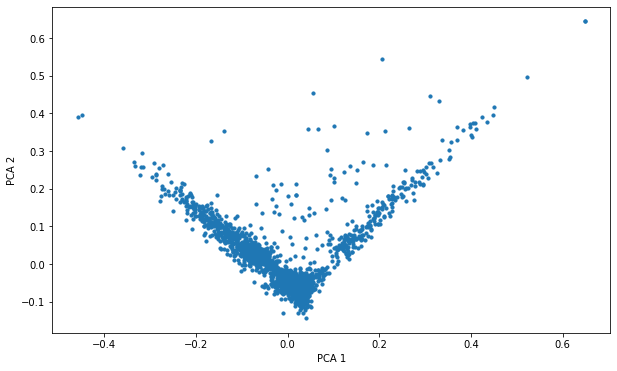

In [35]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix_united_neg.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc326bef940>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


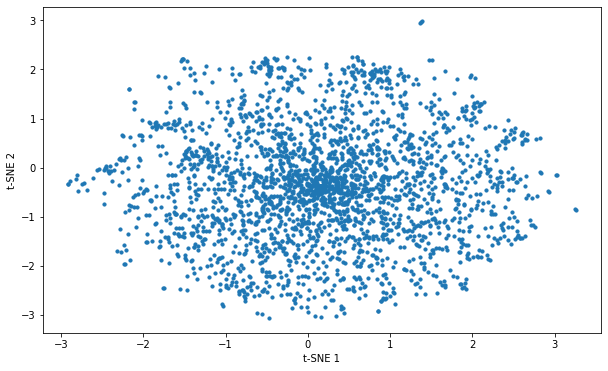

In [36]:
tsne = TSNE(n_components=2, random_state=99)
tsne_data = tsne.fit_transform(tfidf_matrix_united_neg.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543d01d30>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


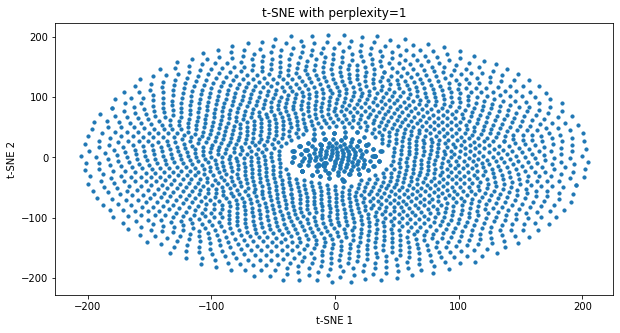

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543cbdaf0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


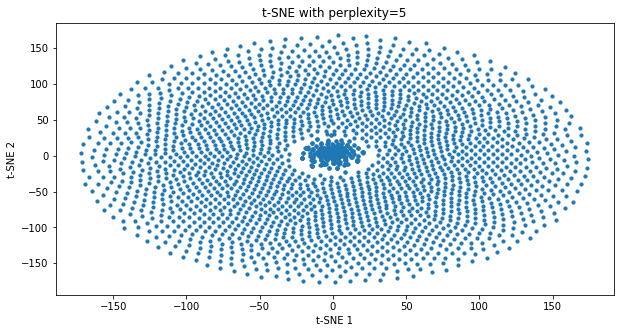

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543c83550>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


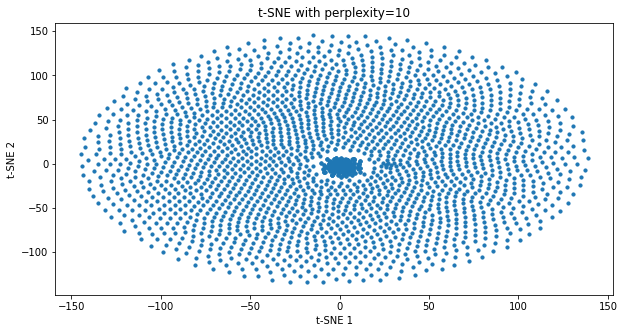

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543cdca60>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


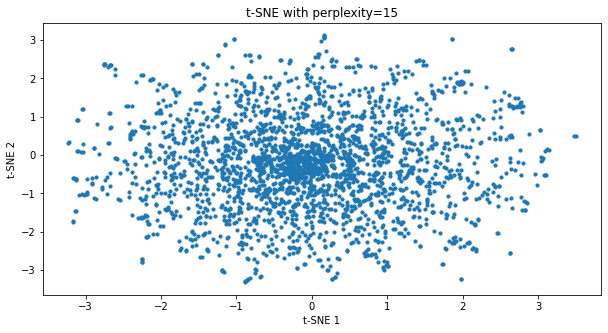

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543c1e5e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


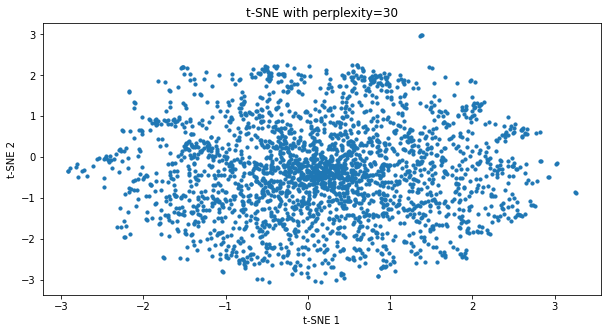

In [37]:
perplexities = [1, 5, 10, 15, 30] 
for perp in perplexities:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=99)
    tsne_results = tsne.fit_transform(tfidf_matrix_united_neg.toarray())
    
    plt.figure(figsize=(10, 5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=10)
    plt.title(f't-SNE with perplexity={perp}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()

# Since data isnt spherical and deosnt have unique clusters, using K-Means is a bad idea. 

In [38]:
n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=99)
kmeans.fit(tfidf_matrix_united_neg)
clusters = kmeans.labels_
df_united_neg['cluster'] = clusters

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543ae74c0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_versio

/tmp/ipykernel_339/3077854100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united_neg['cluster'] = clusters


In [39]:
n_topics = 5  
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(tfidf_matrix_united_neg)

LatentDirichletAllocation(n_components=5, random_state=0)

In [40]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tfidf_vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
worst service flight customer bag united waiting flying airline connection
Topic 1:
flight cancelled flightled luggage delayed http plane united like today
Topic 2:
flight gate customer trying sure seats time service new http
Topic 3:
flight guys problems know delayed dm service booking ticket hours
Topic 4:
flight hour time service plane hours customer help delay delayed


In [41]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Example parameters, adjust them as needed.
dbscan_clusters = dbscan.fit_predict(tfidf_matrix_united_neg.toarray())

unique_clusters = set(dbscan_clusters)
print(f"Number of clusters: {len(unique_clusters) - (1 if -1 in unique_clusters else 0)}")
print(f"Noise points: {list(dbscan_clusters).count(-1)}")

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543ae7f70>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Number of clusters: 1
Noise points: 2622


In [42]:
topic_results = lda.transform(tfidf_matrix_united_neg)
df_united_neg['topic'] = topic_results.argmax(axis=1)

for i in range(n_clusters):
    print(f"\nCluster {i} common topics:")
    print(df_united_neg[df_united_neg['cluster'] == i]['topic'].value_counts().head(10))


Cluster 0 common topics:
topic
4    93
3    37
1    34
2    33
0    33
Name: count, dtype: int64

Cluster 1 common topics:
topic
1    80
3    32
4    26
0     9
2     8
Name: count, dtype: int64

Cluster 2 common topics:
topic
4    54
0    52
2    33
3    30
1     6
Name: count, dtype: int64

Cluster 3 common topics:
topic
1    124
3    109
4     99
2     87
0     79
Name: count, dtype: int64

Cluster 4 common topics:
topic
3    364
4    339
1    308
0    290
2    274
Name: count, dtype: int64


/tmp/ipykernel_339/3086971555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united_neg['topic'] = topic_results.argmax(axis=1)


# TEST

In [43]:
unique_negative_reasons = df_united_neg['negativereason'].nunique()
unique_negative_reasons

10

In [44]:
pca = PCA(n_components=500)
reduced_data = pca.fit_transform(tfidf_matrix_united_neg.toarray())

In [45]:
kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=0)
kmeans.fit(tfidf_matrix_united_neg)
clusters = kmeans.labels_
df_united_neg['cluster'] = clusters


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543b0bc10>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_versio

/tmp/ipykernel_339/1839039099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united_neg['cluster'] = clusters


In [46]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [47]:
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_united_neg[df_united_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=1, random_state=0)  # One topic per cluster
    lda.fit(cluster_texts)
    print(f"Cluster {i} (corresponding to negative reason):")
    print_top_words(lda, tfidf_vectorizer.get_feature_names_out(), 10)
    if 'negativereason' in df_united_neg.columns:
        print("Actual negative reasons in this cluster:")
        print(df_united_neg[df_united_neg['cluster'] == i]['negativereason'].value_counts())
        print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reason):
Topic #0: gate waiting sitting hour flight plane minutes tarmac min agent

Actual negative reasons in this cluster:
negativereason
Late Flight                    70
Bad Flight                     16
Customer Service Issue         15
Flight Attendant Complaints    14
Can't Tell                      9
Lost Luggage                    9
longlines                       8
Flight Booking Problems         3
Cancelled Flight                3
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reason):
Topic #0: time flight late flightr hours amp united departure fly hour

Actual negative reasons in this cluster:
negativereason
Late Flight                    90
Customer Service Issue         47
Lost Luggage                   14
Can't Tell                     14
Bad Flight                     13
Flight Attendant Complaints    12
Flight Booking Problems        10
Cancelled Flight                9
lo

# TEST

# New usefull stuff

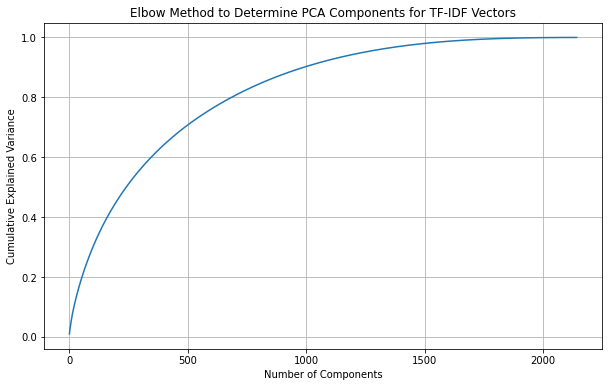

In [48]:

n_components = min(tfidf_matrix_united_neg.shape[0], tfidf_matrix_united_neg.shape[1])
pca = PCA(n_components=n_components)
pca.fit(tfidf_matrix_united_neg.toarray())  


plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method to Determine PCA Components for TF-IDF Vectors')
plt.grid(True)
plt.show()

In [49]:
n_components

2144

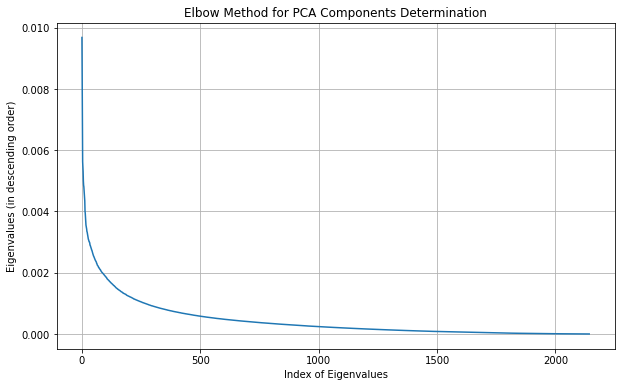

In [50]:
n_components = min(tfidf_matrix_united_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_united_neg.toarray())  # Convert sparse matrix to dense

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination')
plt.grid(True)
plt.show()

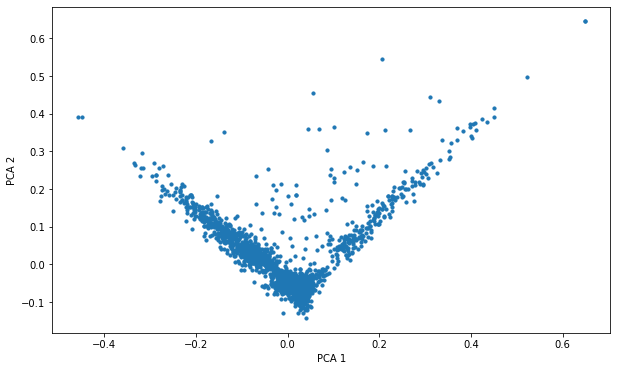

In [51]:
n_components = 300 #number of components using elbow method
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_united_neg.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [52]:
kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=42)
kmeans.fit(pca_transformed_data)

cluster_labels = kmeans.labels_


df_united_neg['Cluster'] = cluster_labels

silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543ac4430>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_versio

/tmp/ipykernel_339/4141131883.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united_neg['Cluster'] = cluster_labels


Average Silhouette Score: 0.020889024022795494


In [53]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_united_neg[df_united_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_united_neg[df_united_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: gate waiting sitting hour flight plane minutes tarmac min agent
Actual negative reasons in this cluster:
negativereason
Late Flight                    70
Bad Flight                     16
Customer Service Issue         15
Flight Attendant Complaints    14
Can't Tell                      9
Lost Luggage                    9
longlines                       8
Flight Booking Problems         3
Cancelled Flight                3
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: time flight late flightr hours amp united departure fly hour
Actual negative reasons in this cluster:
negativereason
Late Flight                    90
Customer Service Issue         47
Lost Luggage                   14
Can't Tell                     14
Bad Flight                     13
Flight Attendant Complaints    12
Flight Booking Problems        10
Cancelled Flight                9
lo

In [54]:
#not a great silhouette score for kmeans
#will try clustering with DBSCAN

In [55]:
dbscan = DBSCAN(eps=0.3, min_samples=10)  
dbscan.fit(pca_transformed_data)


cluster_labels = dbscan.labels_

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543ac4d30>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Estimated number of clusters: 1
Estimated number of noise points: 2611


In [56]:
silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

Average Silhouette Score: -0.27217984882119967


In [57]:
#even worse silhouette score 
#now using GMM

In [58]:
num_clusters = unique_negative_reasons  
gmm = GaussianMixture(n_components=num_clusters, random_state=99)
gmm.fit(pca_transformed_data)


cluster_labels = gmm.predict(pca_transformed_data)


df_united_neg['Cluster'] = cluster_labels

# Step 3: Calculate the silhouette score for GMM clustering
silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Silhouette Score for GMM Clustering: {silhouette_avg}")

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543aacd30>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/tmp/ipykernel_339/2074865230.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Silhouette Score for GMM Clustering: -0.0009550894052016564


In [59]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_united_neg[df_united_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_united_neg[df_united_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: gate waiting sitting hour flight plane minutes tarmac min agent
Actual negative reasons in this cluster:
negativereason
Late Flight                    70
Bad Flight                     16
Customer Service Issue         15
Flight Attendant Complaints    14
Can't Tell                      9
Lost Luggage                    9
longlines                       8
Flight Booking Problems         3
Cancelled Flight                3
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: time flight late flightr hours amp united departure fly hour
Actual negative reasons in this cluster:
negativereason
Late Flight                    90
Customer Service Issue         47
Lost Luggage                   14
Can't Tell                     14
Bad Flight                     13
Flight Attendant Complaints    12
Flight Booking Problems        10
Cancelled Flight                9
lo

# AMERICAN

In [60]:
df_am = df[df['airline'] == 'American']
df_am_neg = df_am[df_am['airline_sentiment'] == 'negative']
df_am_neg

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric,predicted_sentiment_linReg,predicted_sentiment_SVC
11879,570308309682675712,negative,1.0000,Customer Service Issue,American,@AmericanAir why would I even consider continu...,Quito,"02, 24, 2015",11:44,would even consider continuing point program r...,-0.5423,negative,-1,-1,-1
11881,570307949614256128,negative,0.6316,Bad Flight,American,@AmericanAir thanks for getting back to me. Bu...,Central Time (US & Canada),"02, 24, 2015",11:43,thanks getting back find airlines future,0.4404,positive,-1,1,-1
11882,570307948171423745,negative,0.6846,Flight Booking Problems,American,@AmericanAir why would I pay $200 to reactivat...,Quito,"02, 24, 2015",11:43,would pay 200 reactivate points useful certain...,0.6705,positive,-1,-1,-1
11883,570307434113310720,negative,0.6547,Late Flight,American,"@AmericanAir stranded for 24 hours in MIA, Pat...",Atlantic Time (Canada),"02, 24, 2015",11:41,stranded 24 hours mia patrick casimir aa staff...,0.2023,positive,-1,-1,-1
11884,570307390752608257,negative,1.0000,Flight Booking Problems,American,"@AmericanAir no thanks. As I said, being deni...",NaN,"02, 24, 2015",11:40,thanks said denied miles expired one week ago ...,-0.5106,negative,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14631,569588464896876545,negative,1.0000,Bad Flight,American,@AmericanAir thx for nothing on getting us out...,Eastern Time (US & Canada),"02, 22, 2015",12:04,thx nothing getting us country back us broken ...,-0.1531,negative,-1,-1,-1
14633,569587705937600512,negative,1.0000,Cancelled Flight,American,@AmericanAir my flight was Cancelled Flightled...,Arizona,"02, 22, 2015",12:01,flight cancelled flightled leaving tomorrow mo...,-0.2500,negative,-1,-1,-1
14634,569587691626622976,negative,0.6684,Late Flight,American,@AmericanAir right on cue with the delays👌,Quito,"02, 22, 2015",12:01,right cue delays,0.0000,neutral,-1,-1,-1
14636,569587371693355008,negative,1.0000,Customer Service Issue,American,@AmericanAir leaving over 20 minutes Late Flig...,NaN,"02, 22, 2015",11:59,leaving 20 minutes late flight warnings commun...,-0.7003,negative,-1,-1,-1


In [61]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_am_neg = tfidf_vectorizer.fit_transform(df_am_neg['cleaned text'])

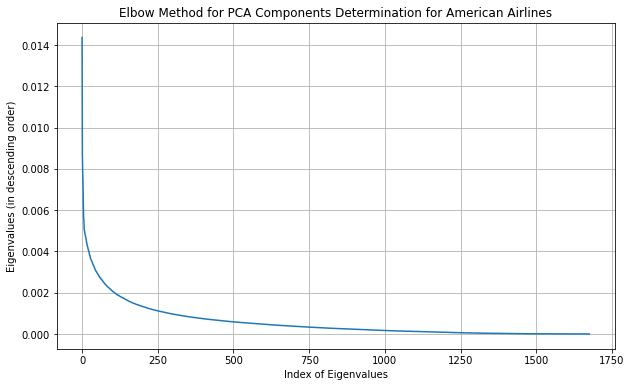

In [62]:
n_components = min(tfidf_matrix_am_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_am_neg.toarray()) 

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination for American Airlines')
plt.grid(True)
plt.show()

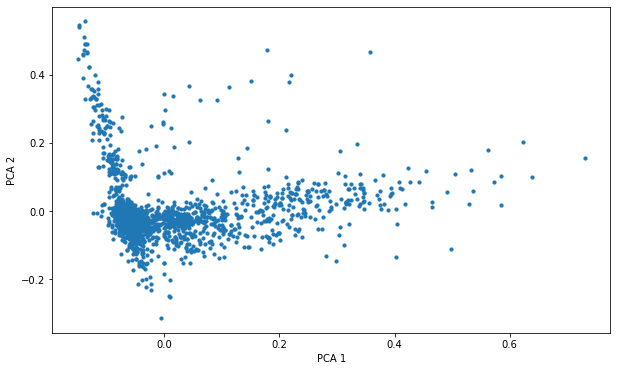

In [63]:
n_components = 125 #number of components using elbow method
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_am_neg.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [64]:
unique_negative_reasons = df_am_neg['negativereason'].nunique()
unique_negative_reasons

kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=42)
kmeans.fit(pca_transformed_data)

cluster_labels = kmeans.labels_


df_am_neg['cluster'] = cluster_labels

silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543a3b670>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_versio

    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/tmp/ipykernel_339/1871764161.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am_neg['cluster'] = cluster_labels


Average Silhouette Score: 0.03945184932485335


In [65]:
df_am_neg.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric,predicted_sentiment_linReg,predicted_sentiment_SVC,cluster
11879,570308309682675712,negative,1.0000,Customer Service Issue,American,@AmericanAir why would I even consider continu...,Quito,"02, 24, 2015",11:44,would even consider continuing point program r...,-0.5423,negative,-1,-1,-1,5
11881,570307949614256128,negative,0.6316,Bad Flight,American,@AmericanAir thanks for getting back to me. Bu...,Central Time (US & Canada),"02, 24, 2015",11:43,thanks getting back find airlines future,0.4404,positive,-1,1,-1,6
11882,570307948171423745,negative,0.6846,Flight Booking Problems,American,@AmericanAir why would I pay $200 to reactivat...,Quito,"02, 24, 2015",11:43,would pay 200 reactivate points useful certain...,0.6705,positive,-1,-1,-1,6
11883,570307434113310720,negative,0.6547,Late Flight,American,"@AmericanAir stranded for 24 hours in MIA, Pat...",Atlantic Time (Canada),"02, 24, 2015",11:41,stranded 24 hours mia patrick casimir aa staff...,0.2023,positive,-1,-1,-1,6
11884,570307390752608257,negative,1.0000,Flight Booking Problems,American,"@AmericanAir no thanks. As I said, being deni...",NaN,"02, 24, 2015",11:40,thanks said denied miles expired one week ago ...,-0.5106,negative,-1,-1,-1,6


In [66]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_am_neg[df_am_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_am_neg[df_am_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: hold hours wait flight minutes phone agent cancelled line reservation
Actual negative reasons in this cluster:
negativereason
Customer Service Issue     72
Cancelled Flight           10
Late Flight                 3
Flight Booking Problems     2
longlines                   1
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: waiting flight hour hours dfw min agent http rampers told
Actual negative reasons in this cluster:
negativereason
Customer Service Issue         27
Late Flight                    23
longlines                       6
Lost Luggage                    5
Cancelled Flight                4
Flight Attendant Complaints     2
Name: count, dtype: int64

----------------------------------------

Cluster 2 (corresponding to negative reasons):
Topic #0: trying flight change need agent reservation online phone tonight help
Actual negative reasons in 

# Delta

In [67]:
df_delta = df[df['airline'] == 'Delta']
df_delta_neg = df_delta[df_delta['airline_sentiment'] == 'negative']
df_delta_neg

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric,predicted_sentiment_linReg,predicted_sentiment_SVC
6749,570307820962373632,negative,1.0000,Flight Attendant Complaints,Delta,"@JetBlue They weren't on any flight, they just...",Quito,"02, 24, 2015",11:42,flight came late flight jetblue employee infor...,0.0000,neutral,-1,-1,-1
6750,570305363859406848,negative,1.0000,Bad Flight,Delta,@JetBlue everyone is here but our pilots are n...,Quito,"02, 24, 2015",11:32,everyone pilots found last flight plane dirty ...,-0.0516,negative,-1,-1,-1
6753,570303683872886784,negative,1.0000,Flight Booking Problems,Delta,"@JetBlue Hey guys, why did my last flight earn...",Eastern Time (US & Canada),"02, 24, 2015",11:26,hey guys last flight earn 0 pts http co 1sywlm...,0.0000,neutral,-1,-1,-1
6754,570299924555956227,negative,1.0000,Can't Tell,Delta,@JetBlue 2 aisles of empty #evermoreroom seats...,NaN,"02, 24, 2015",11:11,2 aisles empty evermoreroom seats move bc pay ...,-0.7717,negative,-1,-1,-1
6755,570297402281893888,negative,0.6913,Flight Attendant Complaints,Delta,@JetBlue ’s Marty St. George really has zero c...,Pacific Time (US & Canada),"02, 24, 2015",11:01,marty st george really zero clue still job nob...,0.0000,neutral,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8958,567696188602712064,negative,1.0000,Late Flight,Delta,@JetBlue A flight delay due to pilots overslee...,NaN,"02, 17, 2015",06:44,flight delay due pilots oversleeping apparentl...,-0.7269,negative,-1,-1,-1
8959,567695310860730369,negative,1.0000,Late Flight,Delta,@JetBlue sitting on the plane in JFK waiting t...,NaN,"02, 17, 2015",06:41,sitting plane jfk waiting take doors open cate...,0.2500,positive,-1,-1,-1
8964,567590027375702016,negative,1.0000,Can't Tell,Delta,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,Pacific Time (US & Canada),"02, 16, 2015",23:43,really getting nerves nothappy,-0.1725,negative,-1,-1,-1
12038,570294451261874177,negative,1.0000,longlines,Delta,@DeltaAssist now at 57 minutes waiting on Silv...,Eastern Time (US & Canada),"02, 24, 2015",10:49,57 minutes waiting silver elite line someone p...,0.4019,positive,-1,-1,-1


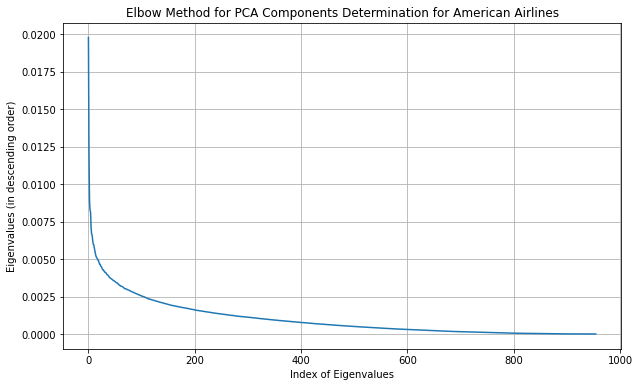

In [68]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_delta_neg = tfidf_vectorizer.fit_transform(df_delta_neg['cleaned text'])

n_components = min(tfidf_matrix_delta_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_delta_neg.toarray()) 

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination for American Airlines')
plt.grid(True)
plt.show()

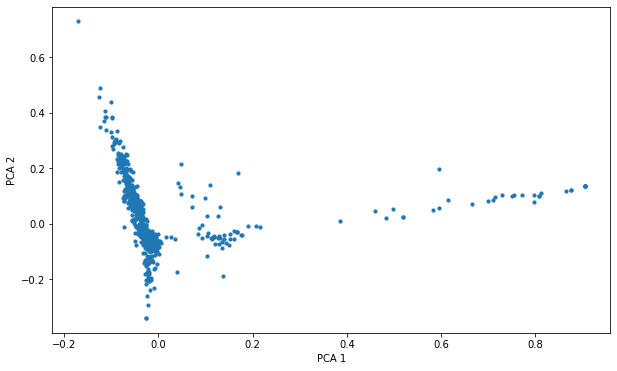

In [69]:
n_components = 90 #elbow method: number of components
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_delta_neg.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [70]:
unique_negative_reasons = df_delta_neg['negativereason'].nunique()
unique_negative_reasons

kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=42)
kmeans.fit(pca_transformed_data)

cluster_labels = kmeans.labels_


df_delta_neg['cluster'] = cluster_labels

silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543a0f550>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_versio

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc5439b6310>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/tmp/ipykernel_339/3975085837.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Average Silhouette Score: 0.06476843472602023


In [71]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_delta_neg[df_delta_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_delta_neg[df_delta_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: fleek fleet http rt stop hate yall jetblue noooo plz
Actual negative reasons in this cluster:
negativereason
Can't Tell                     24
Late Flight                     2
Cancelled Flight                1
Customer Service Issue          1
Flight Attendant Complaints     1
Bad Flight                      1
Flight Booking Problems         1
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: said night 100 flight yes things plane different twice gate
Actual negative reasons in this cluster:
negativereason
Customer Service Issue         6
Flight Attendant Complaints    5
Late Flight                    4
Cancelled Flight               2
longlines                      1
Can't Tell                     1
Name: count, dtype: int64

----------------------------------------

Cluster 2 (corresponding to negative reasons):
Topic #0: jetblue http sit year tickets 

# Virgin America

In [72]:
df_virg = df[df['airline'] == 'Virgin America']
df_virg_neg = df_virg[df_virg['airline_sentiment'] == 'negative']
df_virg_neg

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric,predicted_sentiment_linReg,predicted_sentiment_SVC
3,570301031407624196,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada),"02, 24, 2015",11:15,really aggressive blast obnoxious entertainmen...,-0.3306,negative,-1,-1,-1
4,570300817074462722,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada),"02, 24, 2015",11:14,really big bad thing,-0.5829,negative,-1,-1,-1
5,570300767074181121,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,Pacific Time (US & Canada),"02, 24, 2015",11:14,seriously would pay 30 flight seats playing re...,-0.6240,negative,-1,-1,-1
15,570282469121007616,negative,0.6842,Late Flight,Virgin America,@VirginAmerica SFO-PDX schedule is still MIA.,Pacific Time (US & Canada),"02, 24, 2015",10:01,sfo pdx schedule still mia,-0.2960,negative,-1,-1,-1
17,570276917301137409,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica I flew from NYC to SFO last we...,Eastern Time (US & Canada),"02, 24, 2015",09:39,flew nyc sfo last week fully sit seat due two ...,0.4019,positive,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,567772685472915456,negative,0.6579,Customer Service Issue,Virgin America,@VirginAmerica Umm so no reason as to why this...,NaN,"02, 17, 2015",11:48,umm reason someone different contact contact g...,0.0000,neutral,-1,-1,-1
487,567770107062284288,negative,0.6515,Flight Booking Problems,Virgin America,@virginamerica Trying to make the change in ad...,Eastern Time (US & Canada),"02, 17, 2015",11:38,trying make change advance 24 hours prior trie...,0.0000,neutral,-1,-1,-1
494,567748973910163457,negative,0.6778,Bad Flight,Virgin America,@VirginAmerica mood lighting on point🙌 Reclini...,NaN,"02, 17, 2015",10:14,mood lighting point reclining seat kickin feet,0.0000,neutral,-1,-1,-1
495,567745903474540545,negative,0.3573,Late Flight,Virgin America,@VirginAmerica my flight (6000) scheduled for ...,Atlantic Time (Canada),"02, 17, 2015",10:02,flight 6000 scheduled 1pm departure still says...,-0.3182,negative,-1,-1,-1


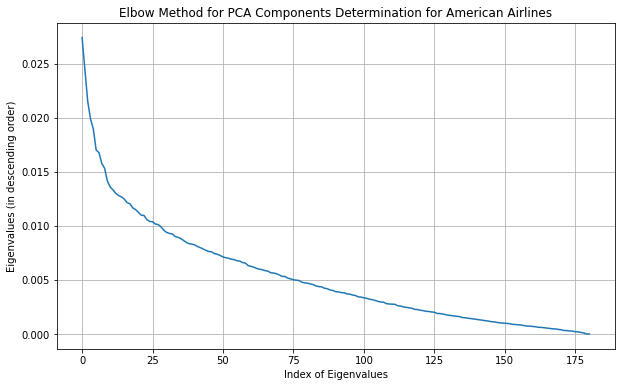

In [73]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_virg_neg = tfidf_vectorizer.fit_transform(df_virg_neg['cleaned text'])

n_components = min(tfidf_matrix_virg_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_virg_neg.toarray())  

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination for American Airlines')
plt.grid(True)
plt.show()

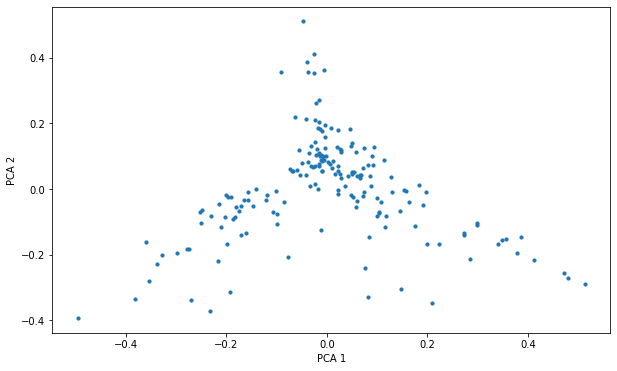

In [74]:
n_components = 25 #elbow method: number of components
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_virg_neg.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [75]:
unique_negative_reasons = df_virg_neg['negativereason'].nunique()
unique_negative_reasons

kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=80)
kmeans.fit(pca_transformed_data)

cluster_labels = kmeans.labels_


df_virg_neg['cluster'] = cluster_labels

silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc54393e5e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_versio

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543a0f4c0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Average Silhouette Score: 0.15410865249501773


/tmp/ipykernel_339/2902233520.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virg_neg['cluster'] = cluster_labels


In [76]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_virg_neg[df_virg_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_virg_neg[df_virg_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: luggage policy lax dm extra central think baggage lost response
Actual negative reasons in this cluster:
negativereason
Damaged Luggage                3
Lost Luggage                   3
Flight Attendant Complaints    1
longlines                      1
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: seat want entertainment laptop 4c open paid stuck guys help
Actual negative reasons in this cluster:
negativereason
Bad Flight                 7
Customer Service Issue     4
Flight Booking Problems    1
Name: count, dtype: int64

----------------------------------------

Cluster 2 (corresponding to negative reasons):
Topic #0: flight bag plane offered carry jfk business time experience check
Actual negative reasons in this cluster:
negativereason
Bad Flight                     7
Late Flight                    6
Can't Tell                     3
Customer Servic

# Southwest

In [77]:
df_sw = df[df['airline'] == 'Southwest']
df_sw_neg = df_sw[df_sw['airline_sentiment'] == 'negative']
df_sw_neg

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric,predicted_sentiment_linReg,predicted_sentiment_SVC
4326,570309156290367488,negative,1.0000,longlines,Southwest,@SouthwestAir still waiting. Just hit one hour.,Atlantic Time (Canada),"02, 24, 2015",11:47,still waiting hit one hour,0.0000,neutral,-1,-1,-1
4327,570309145276125185,negative,0.6361,Cancelled Flight,Southwest,@SouthwestAir although I'm not happy you Cance...,Eastern Time (US & Canada),"02, 24, 2015",11:47,although happy cancelled flighted flight home ...,0.8519,positive,-1,-1,-1
4328,570307615189835777,negative,1.0000,Customer Service Issue,Southwest,@SouthwestAir Hello - been on hold for extreme...,Central Time (US & Canada),"02, 24, 2015",11:41,hello hold extremely long time confirmation am...,0.0000,neutral,-1,-1,-1
4330,570305647759265793,negative,1.0000,Customer Service Issue,Southwest,@SouthwestAir Very frustrated for the loooooon...,Central Time (US & Canada),"02, 24, 2015",11:33,frustrated loooooong wait time speak live pers...,-0.5267,negative,-1,-1,-1
4331,570305078470557697,negative,1.0000,Customer Service Issue,Southwest,@SouthwestAir still no update text #2053 &amp;...,Central Time (US & Canada),"02, 24, 2015",11:31,still update text 2053 amp still response emai...,0.4767,positive,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6738,567688411289755648,negative,1.0000,Cancelled Flight,Southwest,@SouthwestAir flight was Cancelled Flightled a...,NaN,"02, 17, 2015",06:13,flight cancelled flightled let rebook online w...,0.4588,positive,-1,-1,-1
6741,567676626855419904,negative,1.0000,Customer Service Issue,Southwest,@SouthwestAir won't answer their phones #Horri...,NaN,"02, 17, 2015",05:27,answer phones horribleservice neveragain frust...,-0.5267,negative,-1,-1,-1
6742,567663504102940672,negative,1.0000,Late Flight,Southwest,@SouthwestAir We have been stuck in SJU for se...,Eastern Time (US & Canada),"02, 17, 2015",04:35,stuck sju several hours one answering really t...,-0.7425,negative,-1,-1,-1
6744,567617081336950784,negative,1.0000,Customer Service Issue,Southwest,@SouthwestAir you guys there? Are we on hour 2...,Eastern Time (US & Canada),"02, 17, 2015",01:30,guys hour 2 phone hold 3am bc volume short sta...,0.0000,neutral,-1,-1,-1


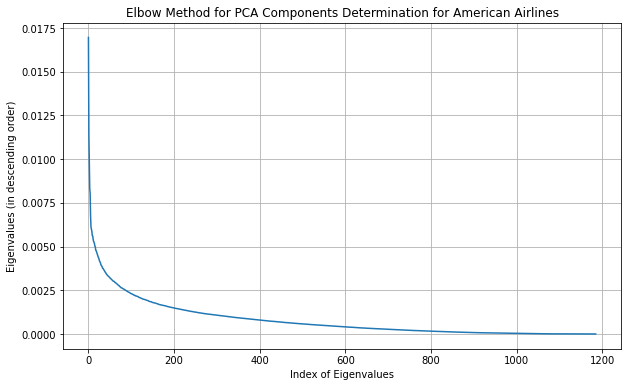

In [78]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_sw_neg = tfidf_vectorizer.fit_transform(df_sw_neg['cleaned text'])

n_components = min(tfidf_matrix_sw_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_sw_neg.toarray())  

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination for American Airlines')
plt.grid(True)
plt.show()

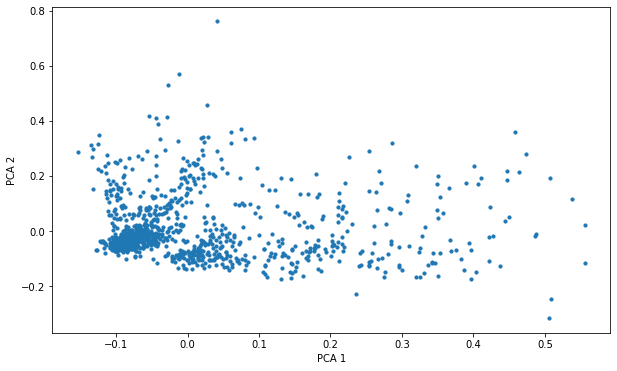

In [79]:
n_components = 90 #elbow metehod: number of components
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_sw_neg.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [80]:
unique_negative_reasons = df_sw_neg['negativereason'].nunique()
unique_negative_reasons

kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=80)
kmeans.fit(pca_transformed_data)

# Cluster labels for each point
cluster_labels = kmeans.labels_


df_sw_neg['cluster'] = cluster_labels

#Analyze the Clustering Results
silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc5438e5e50>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_versio

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc5438e5d30>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/tmp/ipykernel_339/694207817.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Average Silhouette Score: 0.051561847212548056


In [81]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_sw_neg[df_sw_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_sw_neg[df_sw_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: customer service hold terrible worst amp disappointed poor relations airline
Actual negative reasons in this cluster:
negativereason
Customer Service Issue    70
Cancelled Flight           4
Can't Tell                 3
Lost Luggage               1
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: wifi slow paid flight connected inflight plane worst series working
Actual negative reasons in this cluster:
negativereason
Bad Flight                28
Can't Tell                 5
Customer Service Issue     2
Name: count, dtype: int64

----------------------------------------

Cluster 2 (corresponding to negative reasons):
Topic #0: bags hours hrs chicago 35 flight way longer wait claim
Actual negative reasons in this cluster:
negativereason
Lost Luggage                   19
Late Flight                     4
longlines                       4
Damaged Luggage   

# US Airways

In [82]:
df_us = df[df['airline'] == 'US Airways']
df_us_neg = df_us[df_us['airline_sentiment'] == 'negative']
df_us_neg

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric,predicted_sentiment_linReg,predicted_sentiment_SVC
8966,570310600460525568,negative,0.6292,Flight Booking Problems,US Airways,@USAirways is there a better time to call? My...,NaN,"02, 24, 2015",11:53,better time call flight friday need change wor...,0.1779,positive,-1,-1,-1
8967,570310144459972608,negative,1.0000,Customer Service Issue,US Airways,@USAirways and when will one of these agents b...,Atlantic Time (Canada),"02, 24, 2015",11:51,one agents available speak,0.0000,neutral,-1,-1,-1
8970,570308799950692353,negative,1.0000,Customer Service Issue,US Airways,@USAirways just hung up on me again. Another ...,NaN,"02, 24, 2015",11:46,hung another waste hour time supposed book one...,0.1779,positive,-1,-1,-1
8972,570307605631012864,negative,1.0000,Customer Service Issue,US Airways,@USAirways you're killing me from the inside,Quito,"02, 24, 2015",11:41,killing inside,-0.6597,negative,-1,-1,-1
8973,570307109218340865,negative,0.7020,Flight Attendant Complaints,US Airways,@USAirways is not the new @AmericanAir is more...,NaN,"02, 24, 2015",11:39,new like new love aa impressed subpar planes g...,0.8689,positive,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11873,567712600772050945,negative,0.6716,Late Flight,US Airways,@USAirways we are on the 2pm flight FLL to PHL...,Casablanca,"02, 17, 2015",07:50,2pm flight fll phl connection man however dela...,-0.1531,negative,-1,-1,-1
11874,567710245053407232,negative,1.0000,Customer Service Issue,US Airways,@USAirways I have been on hold with your Gold ...,Eastern Time (US & Canada),"02, 17, 2015",07:40,hold gold reservations line 3 hours flight can...,-0.2500,negative,-1,-1,-1
11875,567698031081160704,negative,1.0000,Customer Service Issue,US Airways,.@USAirways we have no choice but to pay anoth...,Quito,"02, 17, 2015",06:52,choice pay another 50 go airport hopes treated...,0.6486,positive,-1,-1,-1
11876,567679487383699456,negative,1.0000,Customer Service Issue,US Airways,@USAirways reservations had me on hold for 2 h...,Eastern Time (US & Canada),"02, 17, 2015",05:38,reservations hold 2 hours hang smh,-0.3182,negative,-1,-1,-1


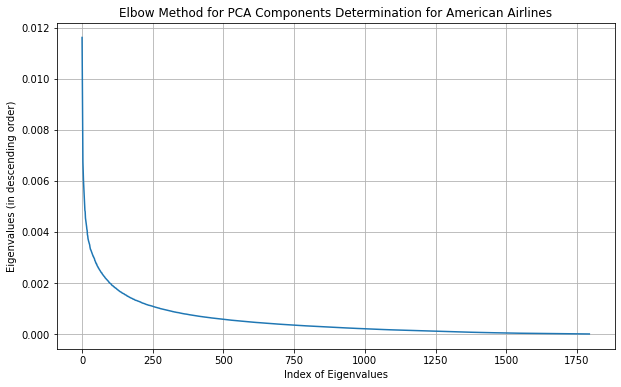

In [83]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_us_neg = tfidf_vectorizer.fit_transform(df_us_neg['cleaned text'])

n_components = min(tfidf_matrix_us_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_us_neg.toarray())  

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination for American Airlines')
plt.grid(True)
plt.show()

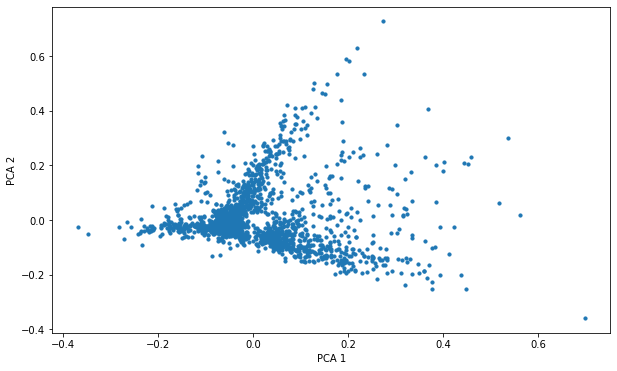

In [84]:
n_components = 125 #elbow method: number of components
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_us_neg.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [85]:
unique_negative_reasons = df_us_neg['negativereason'].nunique()
unique_negative_reasons

kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=80)
kmeans.fit(pca_transformed_data)

# Cluster labels for each point
cluster_labels = kmeans.labels_


df_us_neg['cluster'] = cluster_labels

#Analyze the Clustering Results
silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc543a64820>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_versio

    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/tmp/ipykernel_339/3180145242.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_neg['cluster'] = cluster_labels


Average Silhouette Score: 0.03107549962989665


In [86]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_us_neg[df_us_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_us_neg[df_us_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: minutes hold 45 30 flight waiting help 40 time hours
Actual negative reasons in this cluster:
negativereason
Customer Service Issue         50
Late Flight                    22
longlines                       4
Flight Attendant Complaints     3
Lost Luggage                    2
Cancelled Flight                1
Flight Booking Problems         1
Damaged Luggage                 1
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: cancelled flightled flight flighted hold flights hours trying rebook help
Actual negative reasons in this cluster:
negativereason
Cancelled Flight               116
Customer Service Issue          20
Flight Booking Problems          7
Lost Luggage                     6
Can't Tell                       2
Flight Attendant Complaints      2
longlines                        1
Bad Flight                       1
Late Flight               

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
